In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('C:\Projetos\projeto_5---Estatistica\DelayedFlights.zip')

In [ ]:
#df = pd.read_csv('C:\Projetos\projeto_5---Estatistica\DelayedFlights.zip')
df.drop(columns=['Unnamed: 0','Year'], inplace=True)

In [ ]:
df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#DATAFRAMES USADOS NAS ANÁLISES:
df_eventos = df[['Cancelled','Diverted']].copy()
df_categorico = df[['Month','DayofMonth','DayOfWeek','UniqueCarrier','TailNum','Origin','Dest','CancellationCode']].copy()
df_numericos = df.select_dtypes(include=['number'])
df_numericos.drop(columns=['Month','DayofMonth','DayOfWeek','Cancelled','Diverted','FlightNum'], inplace=True)
df_numericos2 = df.select_dtypes(include=['number'])
df_numericos2.drop(columns=['Month','DayofMonth','DayOfWeek','Cancelled','Diverted','FlightNum','DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], inplace=True)

In [ ]:
dados = {
    'Variável': ['ActualElapsedTime','CRSElapsedTime', 'AirTime', 'ArrDelay',
                 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut','CarrierDelay',
                 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
    'Descrição': ['Tempo real de voo em minutos', 'Tempo previsto de voo em minutos',
                  'Tempo de voo em minutos', 'Atraso na chegada do voo em minutos',
                  'Atraso na partida do voo em minutos', 'Distância do voo em milhas',
                  'Tempo gasto taxiando após o pouso em minutos',
                  'Tempo gasto taxiando antes da decolagem em minutos',
                  'Atraso causado pela companhia aérea em minutos',
                  'Atraso causado pelo clima em minutos',
                  'Atraso causado pelo sistema de controle de tráfego aéreo em minutos',
                  'Atraso causado por questões de segurança em minutos',
                  'Atraso causado por chegada tardia da aeronave anterior em minutos']
}
df_descricao = pd.DataFrame(dados)

In [ ]:
df['DepTime'] = df['DepTime'].astype(str)
df['CRSDepTime'] = df['CRSDepTime'].astype(str)
df['ArrTime'] = df['ArrTime'].astype(str)
df['CRSArrTime'] = df['CRSArrTime'].astype(str)

# Convertendo as strings para objetos de tempo do pandas
df['DepTime'] = pd.to_datetime(df['DepTime'], format='%H%M.%f', errors='coerce')
df['CRSDepTime'] = pd.to_datetime(df['CRSDepTime'], format='%H%M', errors='coerce')
df['ArrTime'] = pd.to_datetime(df['ArrTime'], format='%H%M.%f', errors='coerce')
df['CRSArrTime'] = pd.to_datetime(df['CRSArrTime'], format='%H%M', errors='coerce')

# Formatando os objetos de tempo no formato de 24 horas
df['DepTime'] = df['DepTime'].dt.strftime('%H:%M')
df['CRSDepTime'] = df['CRSDepTime'].dt.strftime('%H:%M')
df['ArrTime'] = df['ArrTime'].dt.strftime('%H:%M')
df['CRSArrTime'] = df['CRSArrTime'].dt.strftime('%H:%M')

df_horas = df[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].copy()

dados_horas = {
    'Variável': ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'],
    'Descrição': ['Hora real de partida do voo', 'Hora prevista de partida do voo',
                  'Hora real de chegada do voo', 'Hora prevista de chegada do voo']
}

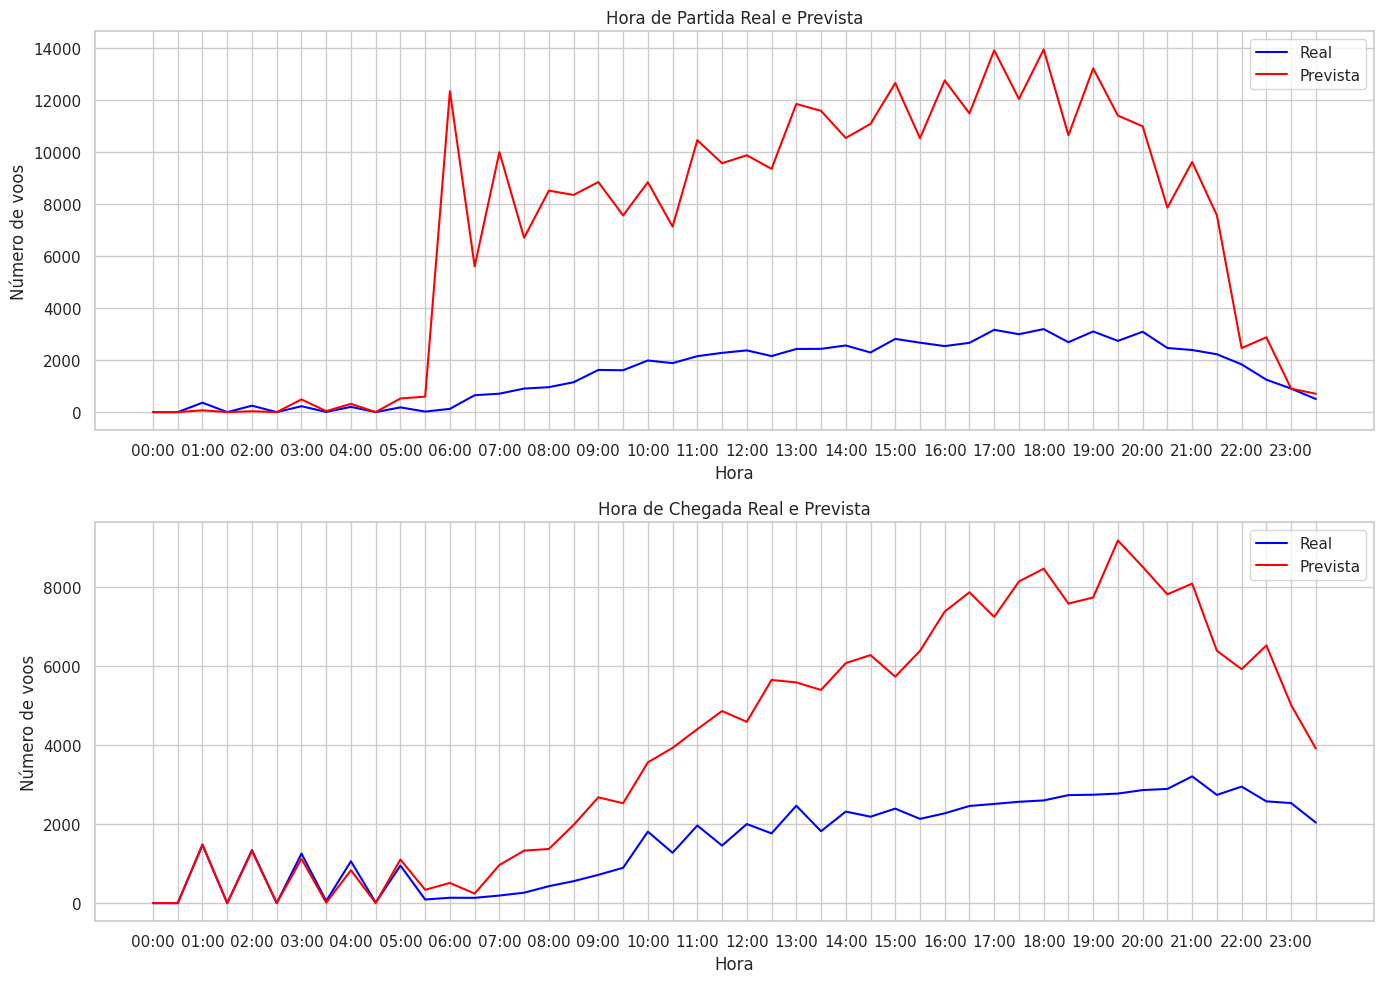

In [ ]:
# Seaborn configuration
sns.set(style="whitegrid")

# Criar um dataframe com as horas de 00:00 até 23:59
hours = pd.date_range('00:00', '23:59', freq='30min').strftime('%H:%M')
df_hours = pd.DataFrame({'Hour': hours})

# Criar subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Agrupar e contar as ocorrências de cada hora para partida real e prevista
for ax, col, title in zip(axes, ['DepTime', 'ArrTime'], ['Hora de Partida Real e Prevista', 'Hora de Chegada Real e Prevista']):
    # Contar as ocorrências de cada hora para partida real
    real_counts = df[col].str.slice(0, 5).value_counts().sort_index()
    # Preencher as horas sem ocorrências com zero
    real_counts = real_counts.reindex(hours, fill_value=0)
    # Plotar o gráfico de linha para partida real
    sns.lineplot(x=real_counts.index, y=real_counts.values, ax=ax, color='blue', label='Real')

    # Contar as ocorrências de cada hora para partida prevista
    prev_counts = df['CRS'+col].str.slice(0, 5).value_counts().sort_index()
    # Preencher as horas sem ocorrências com zero
    prev_counts = prev_counts.reindex(hours, fill_value=0)
    # Plotar o gráfico de linha para partida prevista
    sns.lineplot(x=prev_counts.index, y=prev_counts.values, ax=ax, color='red', label='Prevista')

    ax.set_title(title)
    ax.set_xlabel('Hora')
    ax.set_ylabel('Número de voos')

    # Definir os rótulos do eixo x para exibir apenas as horas em intervalos de uma hora
    hour_labels = [hour if hour.endswith(':00') else '' for hour in hours]
    ax.set_xticks(range(len(hours)))
    ax.set_xticklabels(hour_labels)

# Ajustar o layout
plt.tight_layout()
plt.show()

In [ ]:
#contagem normalizada para Cancelled e Diverted
cancelled_counts_1 = df_eventos['Cancelled'].value_counts()
diverted_counts_1 = df_eventos['Diverted'].value_counts()

cancelled_counts_2 = df_eventos['Cancelled'].value_counts(normalize=True) * 100
diverted_counts_2 = df_eventos['Diverted'].value_counts(normalize=True) * 100


data = {
    'Cancelado (Contagem)': cancelled_counts_1.to_dict(),
    'Desviado (Contagem)': diverted_counts_1.to_dict(),
    'Cancelado (Porcentagem)': cancelled_counts_2.to_dict(),
    'Desviado (Porcentagem)': diverted_counts_2.to_dict()
}

#DataFrame
df_cancel_divert = pd.DataFrame(data)
df_cancel_divert.index = ['Não', 'Sim']  # Alterar os índices para 'Não' e 'Sim'
df_cancel_divert

,Cancelado (Contagem),Desviado (Contagem),Cancelado (Porcentagem),Desviado (Porcentagem)
Não,1936125,1929004,99.967317,99.59964
Sim,633,7754,0.032683,0.40036


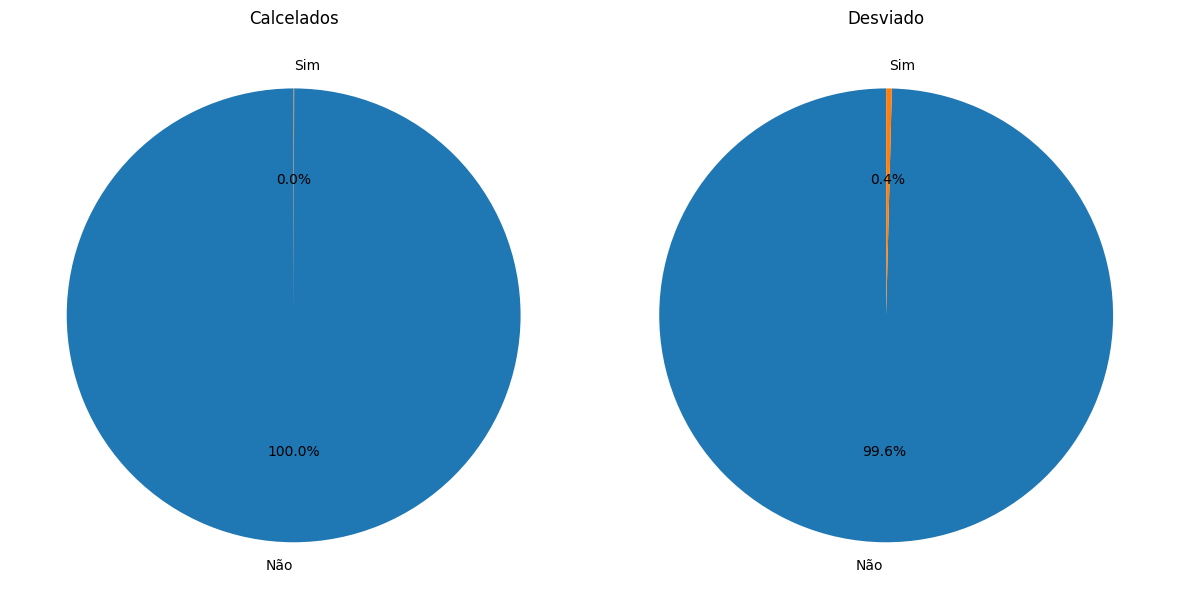

In [ ]:
rotulos = ['Não', 'Sim']


fig, axes = plt.subplots(1, 2, figsize=(12, 6)) #dois subplots

#gráfico 1 (Cancelados)
axes[0].pie(cancelled_counts_2, labels=rotulos, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Calcelados')

#gráfico 2 (Desviados)
axes[1].pie(diverted_counts_2, labels=rotulos, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Desviado')


plt.tight_layout()
plt.show()

In [ ]:

def contagem_normalizada(column):
  '''Calcula a contagem normalizada em porcentagem'''
  count = column.value_counts()
  normalized_count = (column.value_counts(normalize=True) * 100).round(2)
  return pd.DataFrame({'Count': count, 'Normalized Count (%)': normalized_count})

# DataFrame para cada coluna
dfs = {}
for col in df_categorico.columns:
    dfs[col] = contagem_normalizada(df_categorico[col]).sort_index()

for col, df in dfs.items():
    print(f"DataFrame para a coluna '{col}':\n{df}\n")

DataFrame para a coluna 'Month':
     Count  Normalized Count (%)
1   183527                  9.48
2   189534                  9.79
3   200842                 10.37
4   155264                  8.02
5   153072                  7.90
6   200914                 10.37
7   182945                  9.45
8   162648                  8.40
9    95539                  4.93
10  103525                  5.35
11  105563                  5.45
12  203385                 10.50

DataFrame para a coluna 'DayofMonth':
    Count  Normalized Count (%)
1   67815                  3.50
2   63339                  3.27
3   60389                  3.12
4   62682                  3.24
5   60000                  3.10
6   61814                  3.19
7   67478                  3.48
8   62979                  3.25
9   62057                  3.20
10  63385                  3.27
11  63331                  3.27
12  61517                  3.18
13  61278                  3.16
14  64407                  3.33
15  65587          

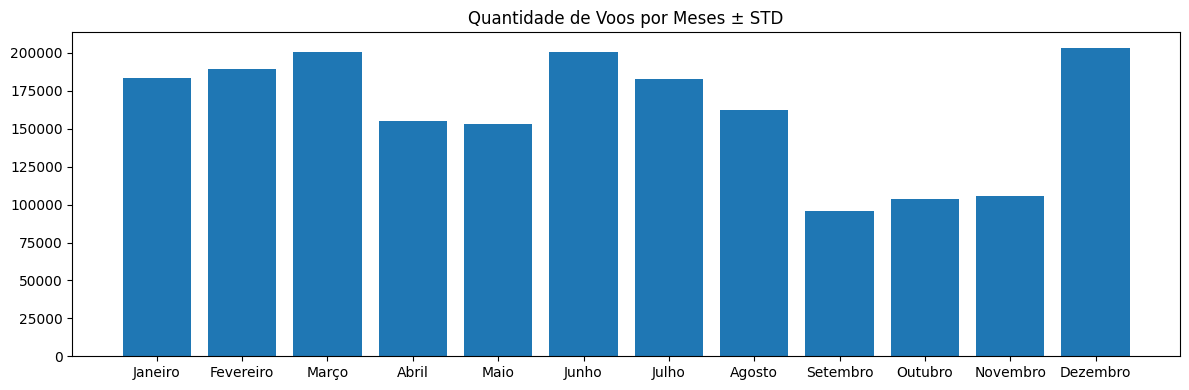

In [ ]:
counts_meses = df_categorico['Month'].value_counts().sort_index()
std_dev_meses = df_categorico['Month'].value_counts().std()

plt.figure(figsize=(12, 4)) #tamanho
plt.bar(counts_meses.index, counts_meses.values) #plot
plt.title('Quantidade de Voos por Meses ± STD') #titulo
plt.grid(False) #grade
plt.xticks(counts_meses.index, ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']) #eixo X
plt.tight_layout()
plt.show()

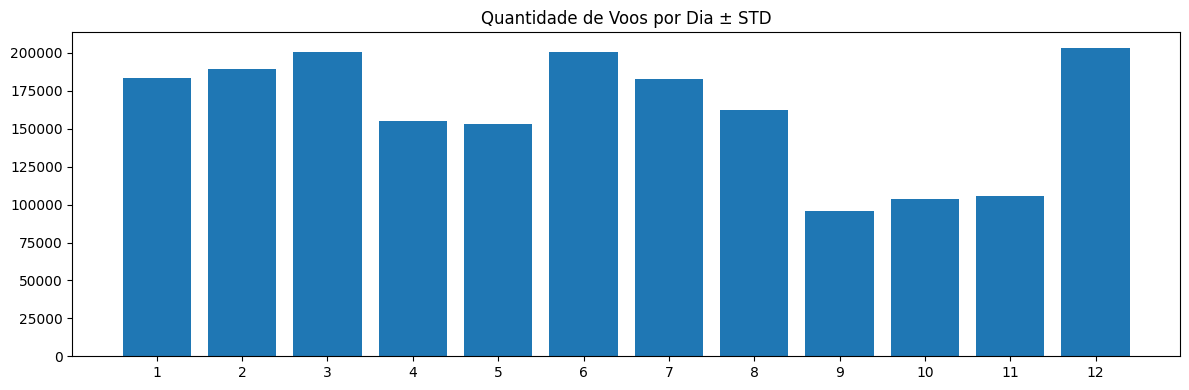

In [ ]:
counts_dias = df_categorico['DayofMonth'].value_counts().sort_index()
std_dev_dias = df_categorico['DayofMonth'].value_counts().std()
counts_dias = counts_dias.sort_index()

plt.figure(figsize=(12, 4)) # Tamanho
plt.bar(counts_meses.index, counts_meses.values)
plt.title('Quantidade de Voos por Dia ± STD')

plt.grid(False)
plt.xticks(counts_meses.index, counts_meses.index)
plt.tight_layout()
plt.show()

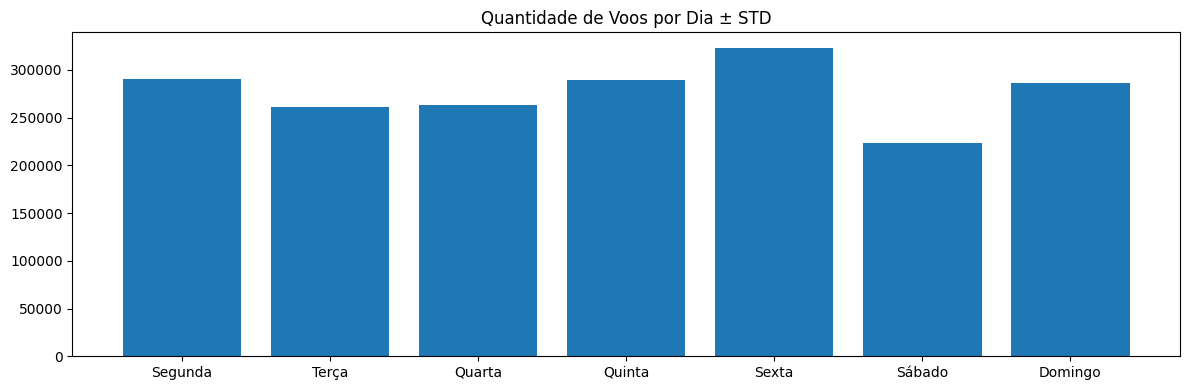

In [ ]:
counts_dias_semana = df_categorico['DayOfWeek'].value_counts().sort_index()
std_dias_semana = df_categorico['DayOfWeek'].value_counts().std()


plt.figure(figsize=(12, 4)) # Tamanho
plt.bar(counts_dias_semana.index, counts_dias_semana.values)
plt.title('Quantidade de Voos por Dia ± STD')

plt.grid(False)
plt.xticks(counts_dias_semana.index, ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.tight_layout()
plt.show()

In [ ]:
df_numericos

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003.0,1955,2211.0,2225,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,754.0,735,1002.0,1000,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,628.0,620,804.0,750,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
3,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1940.0,1915,2121.0,2110,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,1250.0,1220,1617.0,1552,147.0,152.0,120.0,25.0,30.0,906,9.0,18.0,3.0,0.0,0.0,0.0,22.0
1936754,657.0,600,904.0,749,127.0,109.0,78.0,75.0,57.0,481,15.0,34.0,0.0,57.0,18.0,0.0,0.0
1936755,1007.0,847,1149.0,1010,162.0,143.0,122.0,99.0,80.0,689,8.0,32.0,1.0,0.0,19.0,0.0,79.0
1936756,1251.0,1240,1446.0,1437,115.0,117.0,89.0,9.0,11.0,533,13.0,13.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
metricas = {}

# Loop sobre as colunas do DataFrame
for coluna in df_numericos.columns:
    metricas[coluna] = {
        "Média": df_numericos[coluna].mean(),
        "Desvio padrão": df_numericos[coluna].std(),
        "Mínimo": df_numericos[coluna].min(),
        "Q1": df_numericos[coluna].quantile(0.25),
        "Mediana": df_numericos[coluna].median(),
        "Q3": df_numericos[coluna].quantile(0.75),
        "IQR": df_numericos[coluna].quantile(0.75) - df_numericos[coluna].quantile(0.25),
        "Máximo": df_numericos[coluna].max(),
        "Skewness": df_numericos[coluna].skew(),
        "Moda": df_numericos[coluna].mode()[0]
    }

df_metricas = pd.DataFrame(metricas).T
df_metricas

,Média,Desvio padrão,Mínimo,Q1,Mediana,Q3,IQR,Máximo,Skewness,Moda
DepTime,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,697.0,2400.0,-0.409174,1800.0
CRSDepTime,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,680.0,2359.0,-0.226925,1800.0
ArrTime,1610.140629,548.178143,1.0,1316.0,1715.0,2030.0,714.0,2400.0,-1.060491,2100.0
CRSArrTime,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,689.0,2400.0,-0.715685,1930.0
ActualElapsedTime,133.305863,72.060069,14.0,80.0,116.0,165.0,85.0,1114.0,1.427101,80.0
CRSElapsedTime,134.302744,71.341439,-25.0,82.0,116.0,165.0,83.0,660.0,1.439987,75.0
AirTime,108.277147,68.642610,0.0,58.0,90.0,137.0,79.0,1091.0,1.495251,45.0
ArrDelay,42.199885,56.784715,-109.0,9.0,24.0,56.0,47.0,2461.0,3.948780,10.0
DepDelay,43.185176,53.402502,6.0,12.0,24.0,53.0,41.0,2467.0,4.495078,6.0
Distance,765.686159,574.479653,11.0,338.0,606.0,998.0,660.0,4962.0,1.545780,337.0


In [ ]:
df_numericos2.columns

Index(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

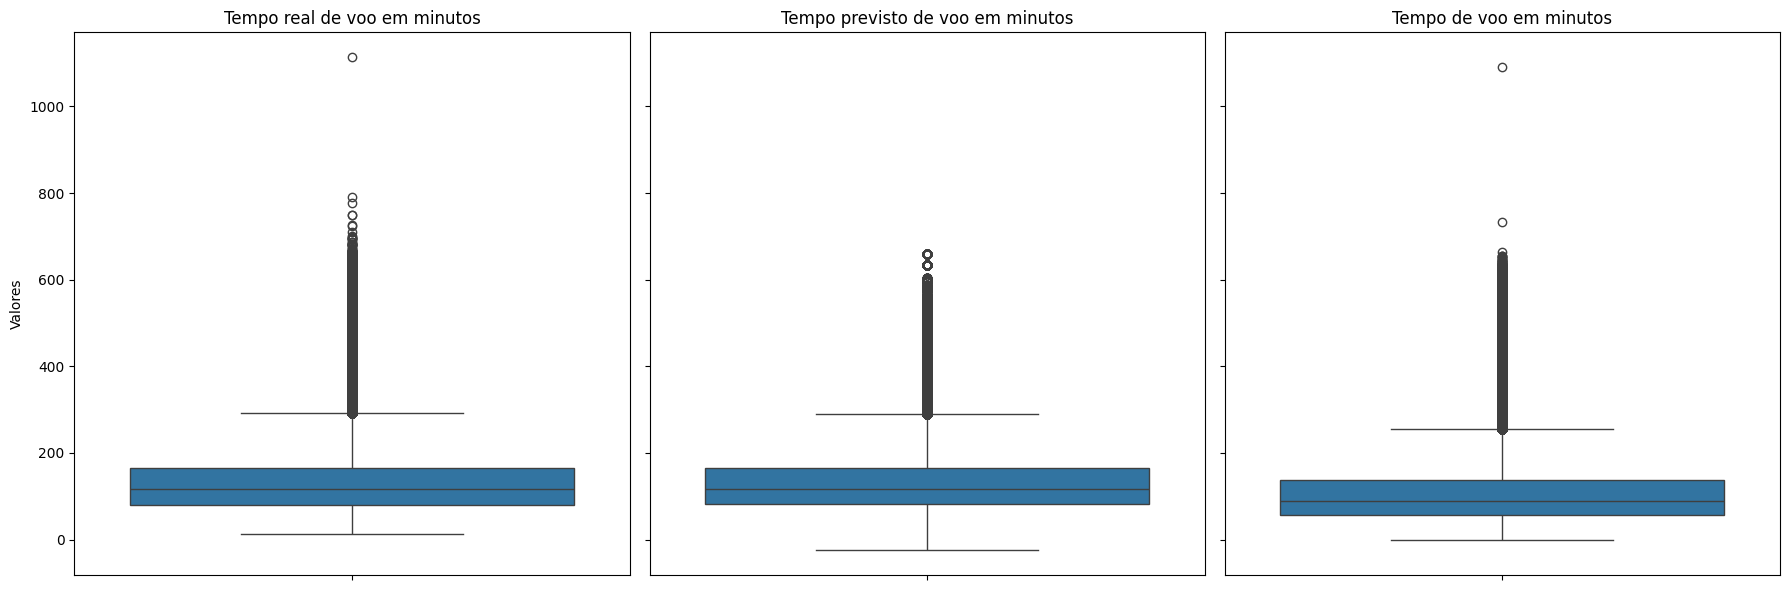

In [ ]:
colunas_escolhidas1 = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime']

fig, axs = plt.subplots(1, len(colunas_escolhidas1), figsize=(18, 6), sharey=True)

for i, coluna in enumerate(colunas_escolhidas1):
    sns.boxplot(y=df_numericos2[coluna], ax=axs[i])
    axs[i].set_title(df_descricao[df_descricao["Variável"] == coluna]["Descrição"].values[0])
    axs[i].set_ylabel('Valores')


plt.tight_layout()
plt.show()

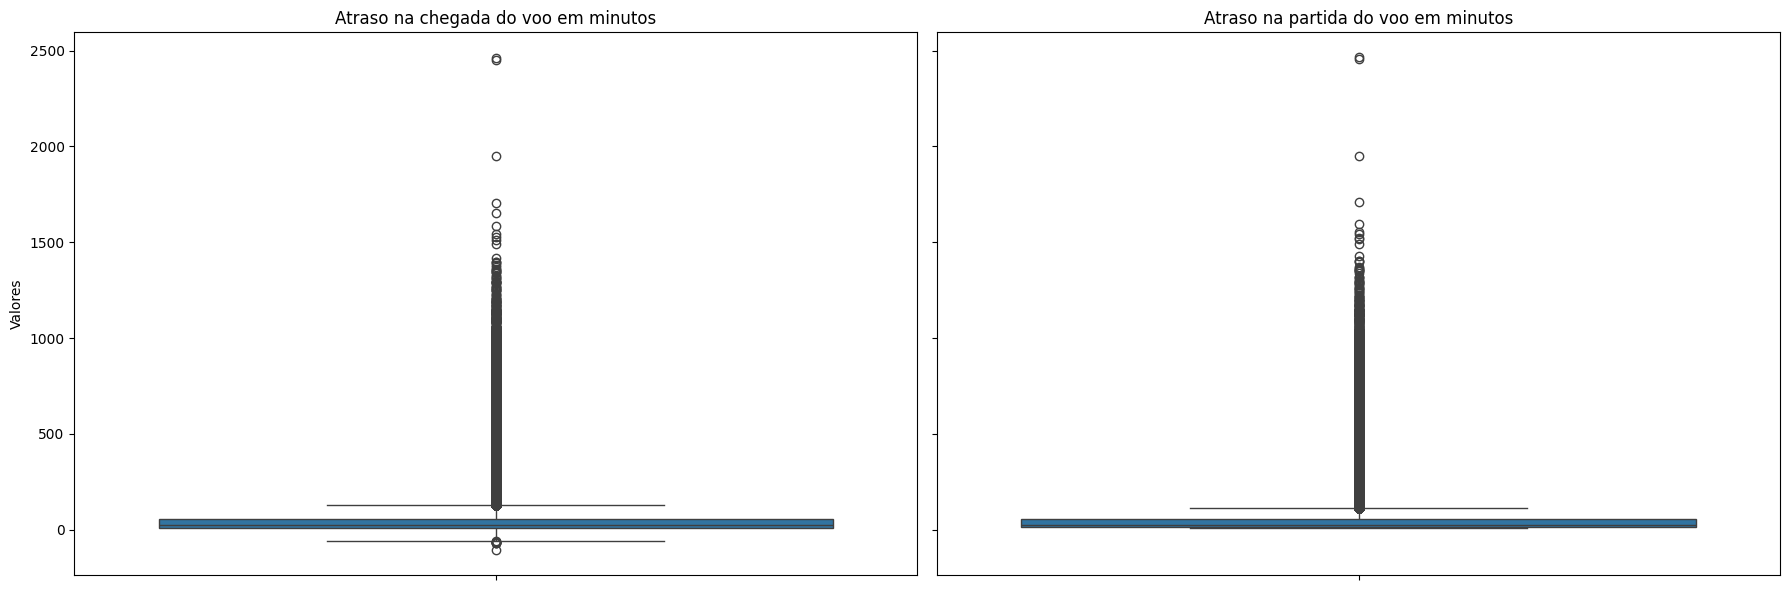

In [ ]:
colunas_escolhidas2 = ['ArrDelay','DepDelay']

fig, axs = plt.subplots(1, len(colunas_escolhidas2), figsize=(18, 6), sharey=True)

for i, coluna in enumerate(colunas_escolhidas2):
    sns.boxplot(y=df_numericos2[coluna], ax=axs[i])
    axs[i].set_title(df_descricao[df_descricao["Variável"] == coluna]["Descrição"].values[0])
    axs[i].set_ylabel('Valores')


plt.tight_layout()
plt.show()

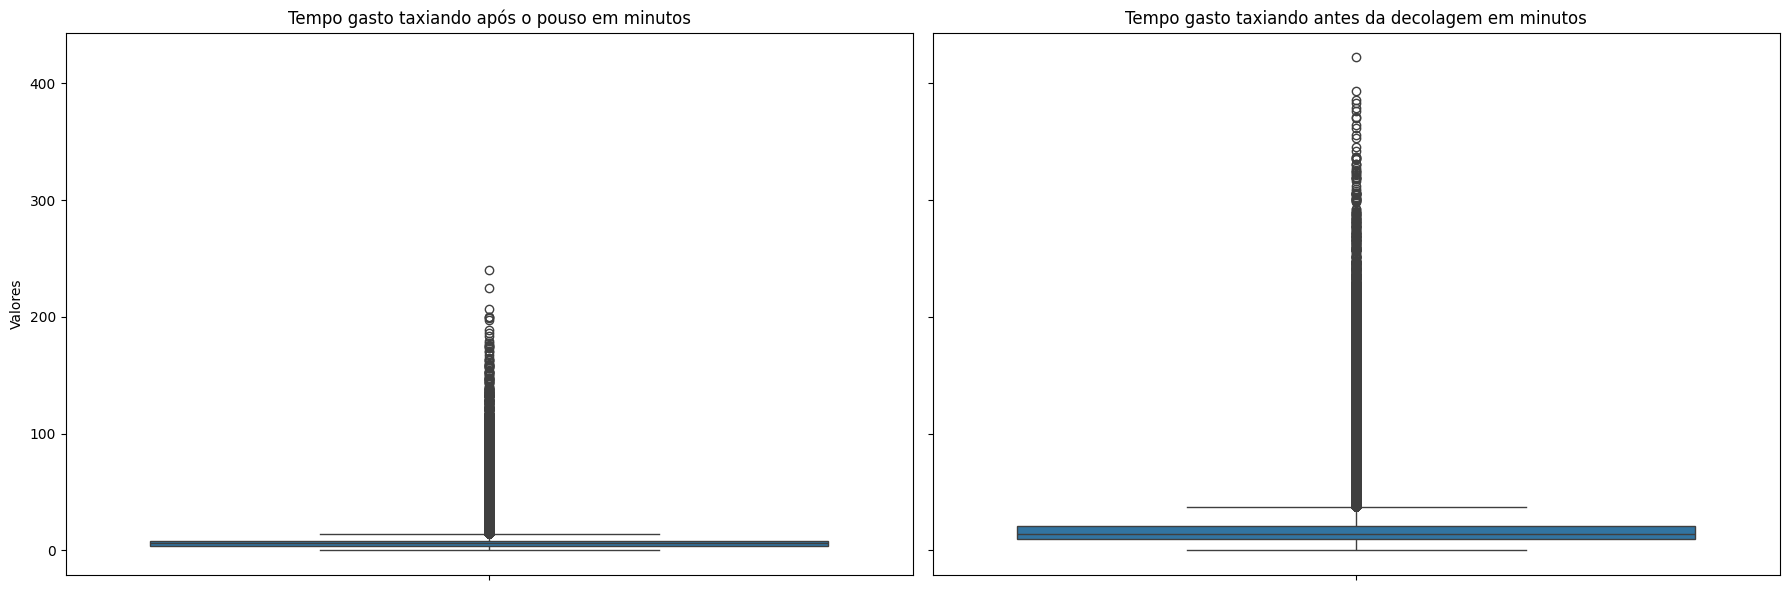

In [ ]:
colunas_escolhidas3 = ['TaxiIn', 'TaxiOut']

fig, axs = plt.subplots(1, len(colunas_escolhidas3), figsize=(18, 6), sharey=True)

for i, coluna in enumerate(colunas_escolhidas3):
    sns.boxplot(y=df_numericos2[coluna], ax=axs[i])
    axs[i].set_title(df_descricao[df_descricao["Variável"] == coluna]["Descrição"].values[0])
    axs[i].set_ylabel('Valores')


plt.tight_layout()
plt.show()

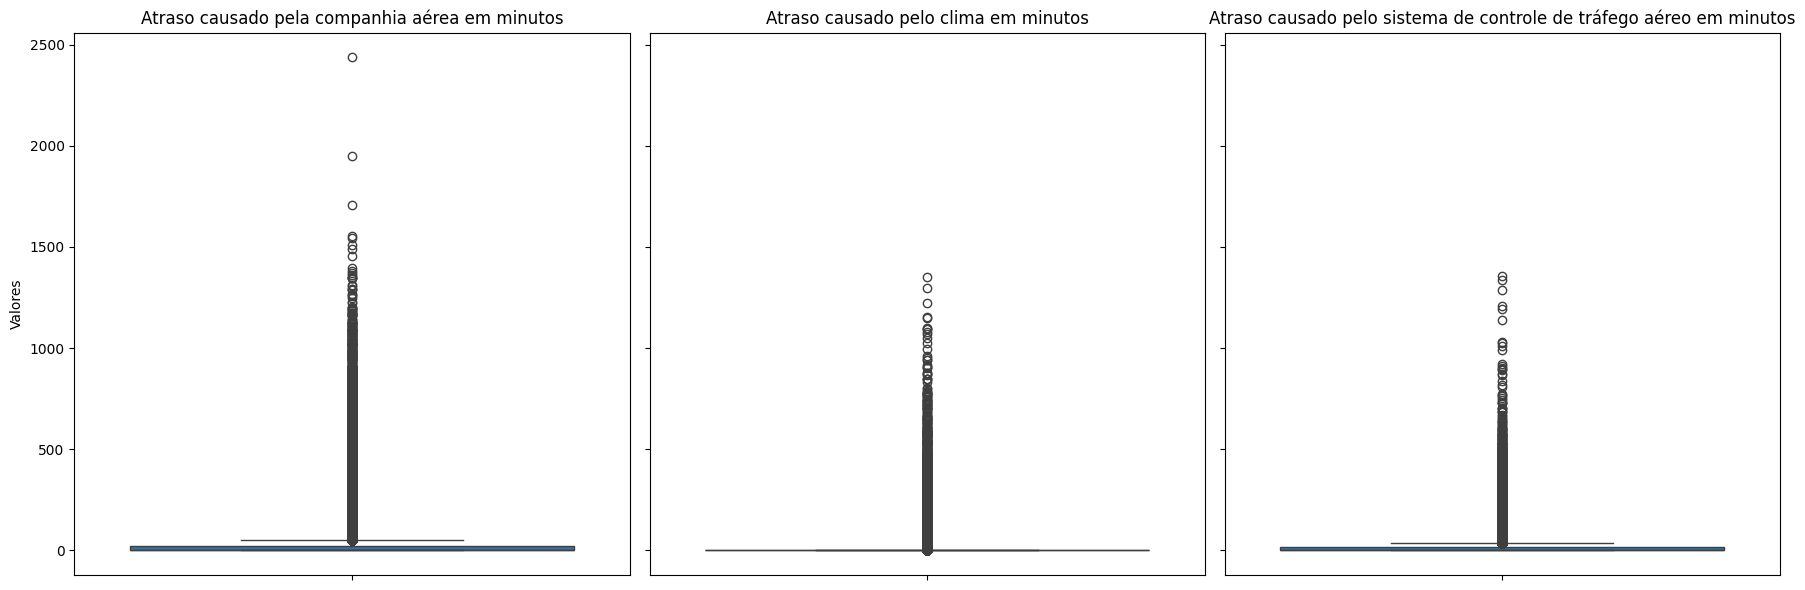

In [ ]:
colunas_escolhidas4 = ['CarrierDelay','WeatherDelay', 'NASDelay']

fig, axs = plt.subplots(1, len(colunas_escolhidas4), figsize=(18, 6), sharey=True)

for i, coluna in enumerate(colunas_escolhidas4):
    sns.boxplot(y=df_numericos2[coluna], ax=axs[i])
    axs[i].set_title(df_descricao[df_descricao["Variável"] == coluna]["Descrição"].values[0])
    axs[i].set_ylabel('Valores')


plt.tight_layout()
plt.show()

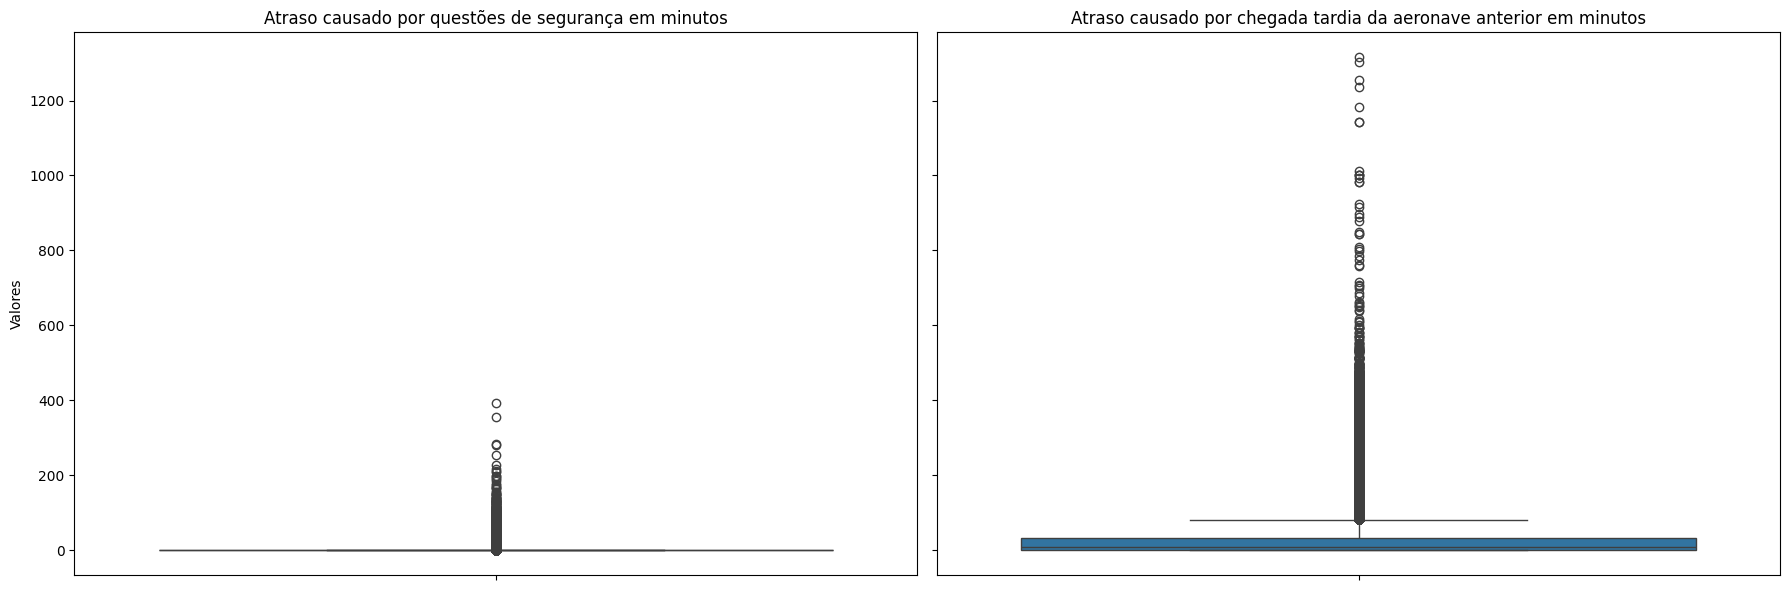

In [ ]:
colunas_escolhidas5 = ['SecurityDelay', 'LateAircraftDelay']

fig, axs = plt.subplots(1, len(colunas_escolhidas5), figsize=(18, 6), sharey=True)

for i, coluna in enumerate(colunas_escolhidas5):
    sns.boxplot(y=df_numericos2[coluna], ax=axs[i])
    axs[i].set_title(df_descricao[df_descricao["Variável"] == coluna]["Descrição"].values[0])
    axs[i].set_ylabel('Valores')


plt.tight_layout()
plt.show()

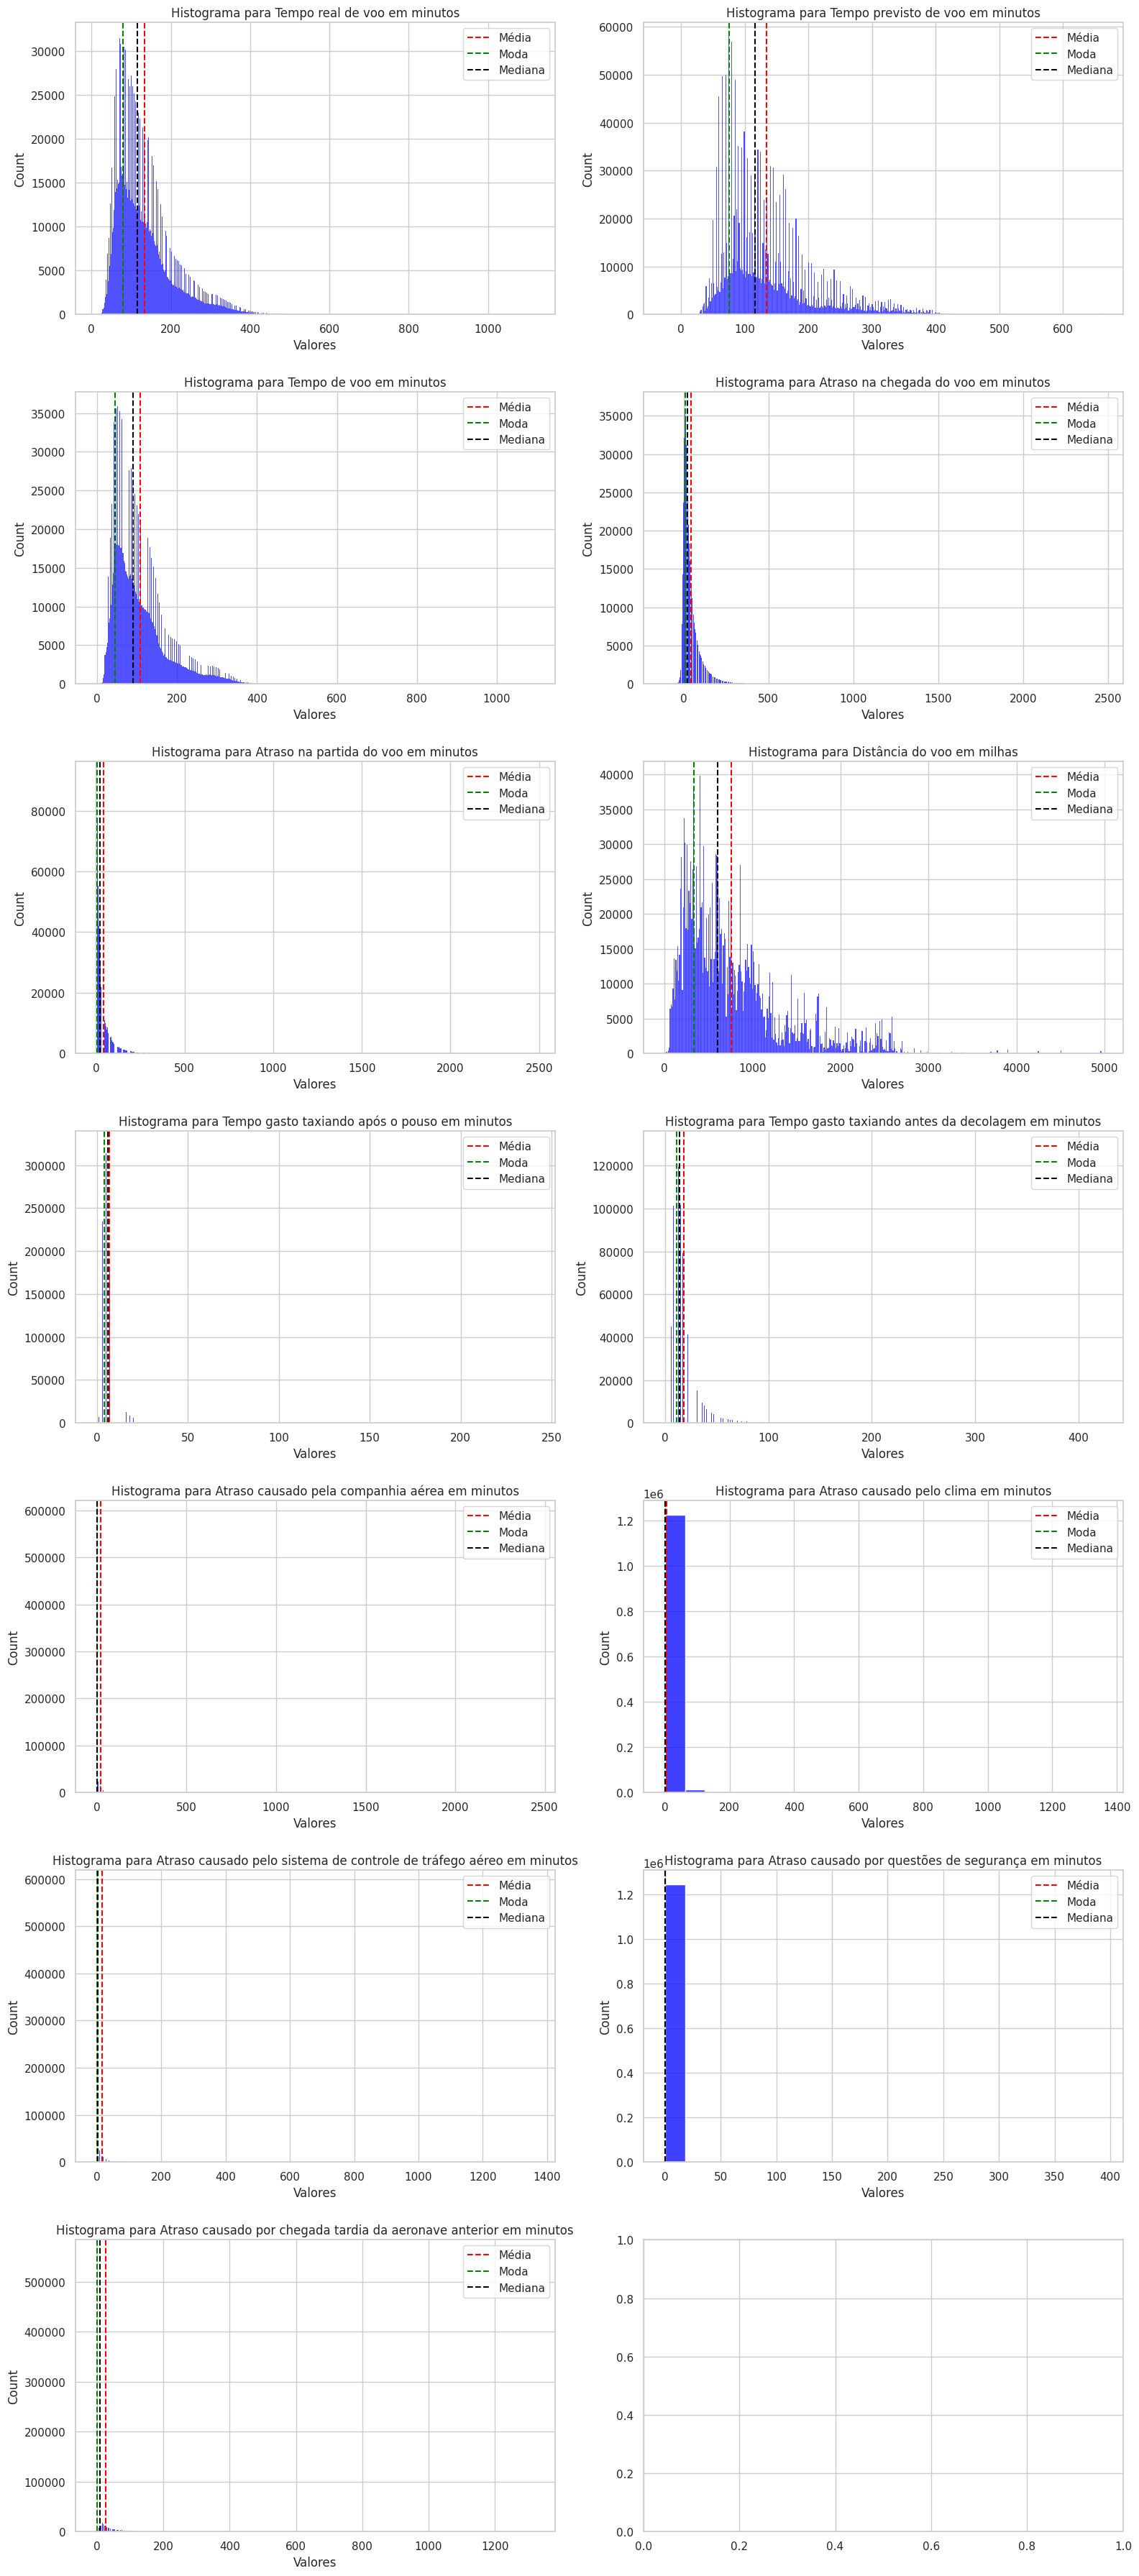

In [ ]:
sns.set(style="whitegrid")

# Calcular o número de linhas e colunas dos subplots
num_colunas = len(df_numericos2.columns)
num_linhas = (num_colunas + 1) // 2


fig, axs = plt.subplots(nrows=num_linhas, ncols=2, figsize=(16, 36)) #Subplots

# Iterar sobre as colunas do DataFrame
for i, coluna in enumerate(df_numericos2.columns):

    linha = i // 2
    col = i % 2

    sns.histplot(df_numericos2[coluna], ax=axs[linha, col], kde=False, color='blue')  # Plota o histograma


    mean = df_numericos2[coluna].mean() #Media
    mode = df_numericos2[coluna].mode().iloc[0] #Moda
    median = df_numericos2[coluna].median() #Mediana
    axs[linha, col].axvline(mean, color='red', linestyle='--', label='Média')  #Média
    axs[linha, col].axvline(mode, color='green', linestyle='--', label='Moda')  #Moda
    axs[linha, col].axvline(median, color='black', linestyle='--', label='Mediana')  #Mediana

# Titulos
    titulo = df_descricao.iloc[df_numericos2.columns.get_loc(coluna), 1]
    axs[linha, col].set_title(f'Histograma para {titulo}')
    axs[linha, col].legend()

plt.tight_layout()
plt.show()

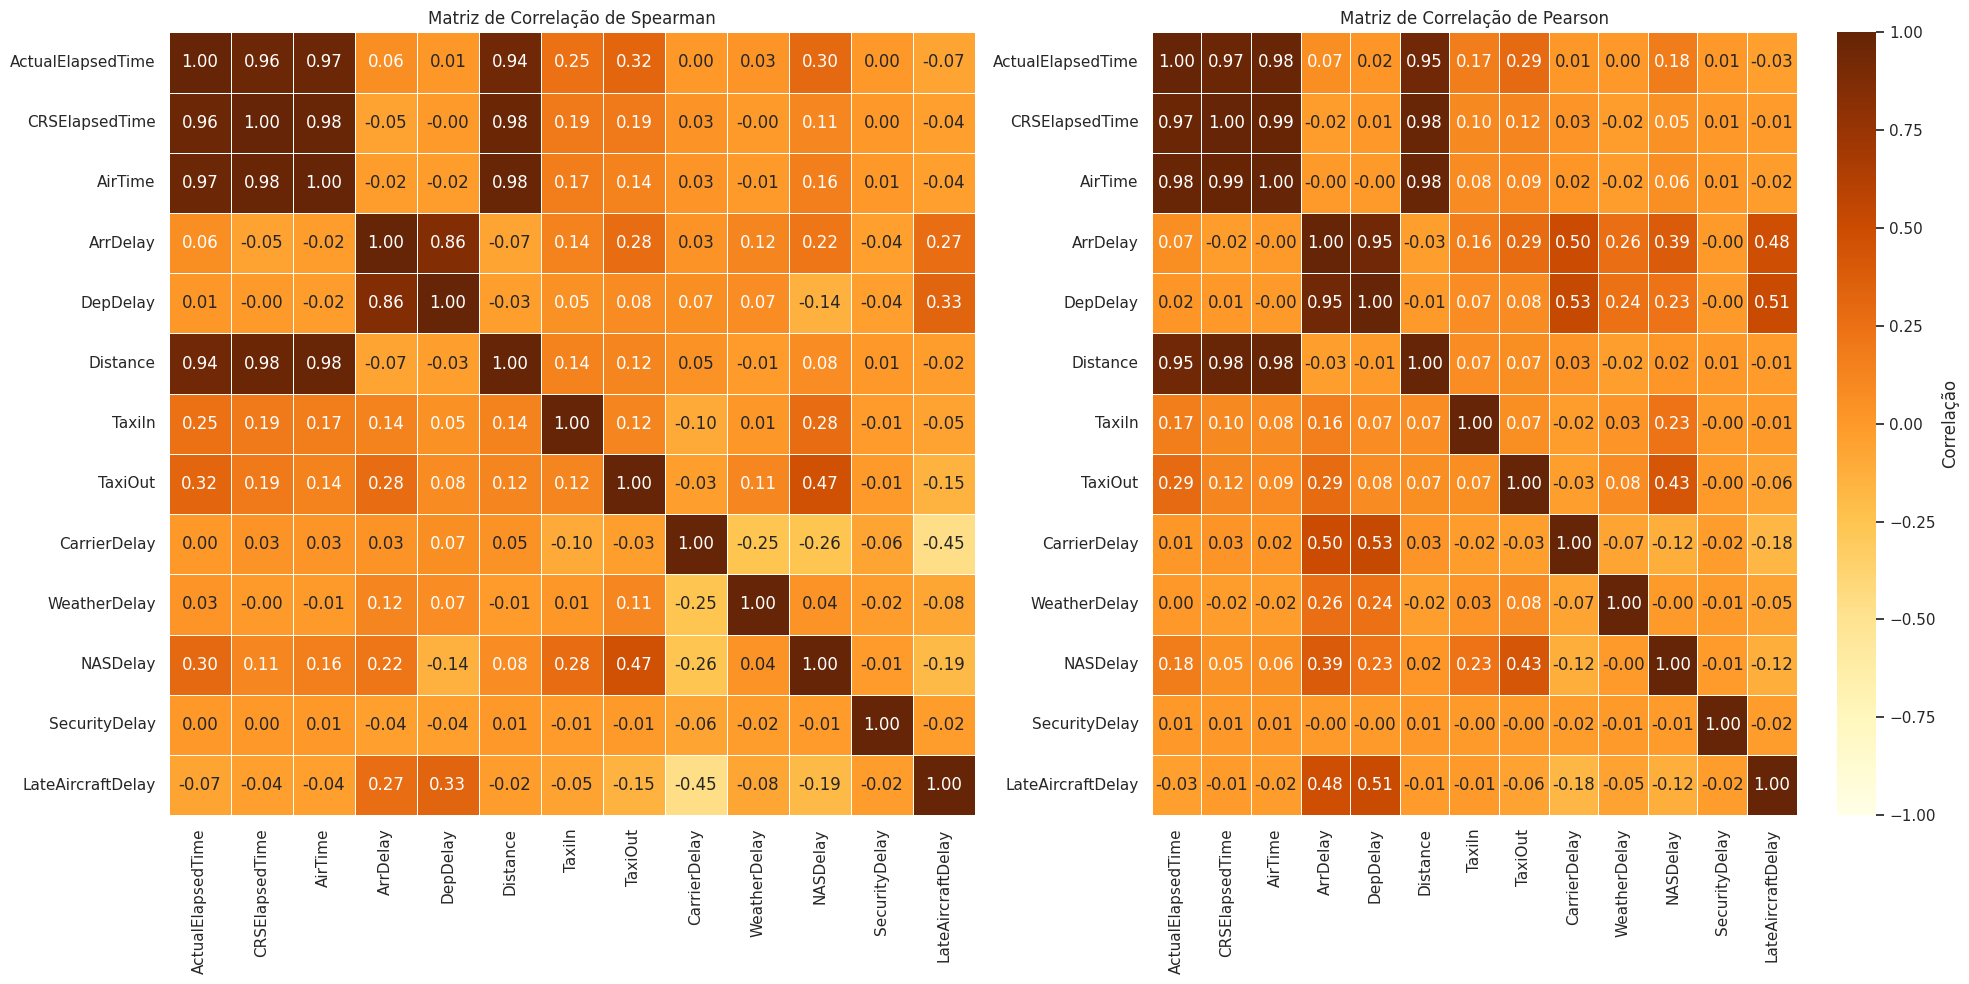

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10)) #dois subplots lado a lado

#Correlação de Spearman
corr_matrix_spearman = df_numericos2.corr(method="spearman")
sns.heatmap(corr_matrix_spearman, annot=True,
            cmap="YlOrBr", vmin=-1, vmax=1,
            fmt=".2f", linewidths=.5,
            cbar=False,
            ax=axs[0])

axs[0].set_title("Matriz de Correlação de Spearman")

#Correlação de Pearson
corr_matrix_pearson = df_numericos2.corr(method="pearson")
sns.heatmap(corr_matrix_pearson, annot=True,
            cmap="YlOrBr", vmin=-1, vmax=1,
            fmt=".2f", linewidths=.5,
            cbar_kws={"label": "Correlação"},
            ax=axs[1])

axs[1].set_title("Matriz de Correlação de Pearson")

plt.tight_layout()
plt.show()